# Gold endowment of Quadrilátero Ferrífero Province through rank-size statistical analysis

Iago Costa*
CPRM - Geological Survey of Brazil
*iago.costa@cprm.gov.br

Guilherme Silva*
CPRM - Geological Survey of Brazil
*guilherme.ferreira@cprm.gov.br

Marcos Ferreira*
CPRM - Geological Survey of Brazil
*marcos.ferreira@cprm.gov.br

This is an executable version of a paper send to Journal of the Geological Survey of Brazil. This notebooks contains the code to generate the figures of the paper which was send to review.

When the paper is published it could be found [here](https://jgsb.cprm.gov.br/index.php/journal/index).

In [182]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator
from IPython.display import Latex
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 
plt.style.use('seaborn-darkgrid')


In [183]:
# Functions 

def find_nearest(array, value):
    ''' find the nearest value in array '''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


def test_distributions(value):
    ''' Compare the distribution between power law and other regressions '''

    results = powerlaw.Fit(value)
    
    R, p = results.distribution_compare('power_law', 'exponential')
    
    print('\nExponential (R) = %.2f  p = %.2f\n' % (R,p))
    
    R, p = results.distribution_compare('power_law', 'truncated_power_law')
    
    print('Truncated Power-Law (R) = %.2f  p = %.2f\n' % (R,p))
    
    R, p = results.distribution_compare('power_law', 'stretched_exponential')
    
    print('Stretched Exponential (R) = %.2f  p = %.2f\n' % (R,p))
    
    R, p = results.distribution_compare('power_law', 'lognormal_positive')
    
    print('Lognormal positive (R) = %.2f  p = %.2f\n' % (R,p))
    
    return results.power_law.xmin


def zipf_fill(value,cutoff):
    ''' Function to fill the data with zipf's values '''

    rank_new = []
    value_new = []
    
    max_rank = int(round((value[0]/cutoff)**(1/1.00)))
    x_zipf = np.arange(1., max_rank+1)
    C = value[0]
    y_zipf = C*x_zipf**(-1.00)
        
    for i in range(len(rank)):
        #x = rank[i]
        y = value[i]
             
        index = np.where(y_zipf==(find_nearest(y_zipf,y)))[0] + 1
        if not np.any(rank_new[:] == np.array([index])):
            rank_new.append(int(index))
        else:
            rank_new.append(int(index)+1)
        
        value_new.append(value[i])
        
    rank_reserves =  np.delete(np.arange(0,max_rank), rank_new)[1:]
    values_reserves = value[0]*rank_reserves**(-1.01)
    
    return np.sort(np.concatenate((values_reserves,value)))[::-1],rank_new,value_new


In [184]:
####  Parameters

cutoff = 4   ## Quadrilatero Ferrífero - Cutoff estimated by Kolmogorov-Smirnov’s distance (see the paper for more details)

value = [8.78,70.58,168.62,174.80,8.97,13.26,0.71,38.53,5.28,332.02,35.08,67.11,56.80] # Values modified from Lobato et al., 2016)

#Lobato, L.M., da Costa, M.A., Hagemann, S.G., Martins, R., 2016. 
#Ouro no Brasil: principais depósitos, produção e perspectivas. Recur. Minerais no Bras. 46.

In [185]:
print('Comparison between the power-law and alternative distributions for the gold '
'deposits of the Quadrilátero Ferrífero - Table 2 ')
xmin = test_distributions(value)

########################
rank = np.arange(1,len(value)+1)
value = np.sort(value)[::-1]

max_rank = int(round((value[0]/cutoff)**(1/1.00)))

# Zipfs law
k = 1.00
x_zipf = np.arange(1., len(rank))
C = value[0]
y_zipf = C*x_zipf**(-k)

##########################

display(Latex('Minimum Value $(x_{min}) = %.2f $' % (find_nearest(value,xmin))))

all_reserves,rank_new,value_new = zipf_fill(value,cutoff)

rank_reserves =  np.delete(np.arange(0,max_rank), rank_new)[1:]
values_reserves = value[0]*rank_reserves**(-1.01)


Comparison between the power-law and alternative distributions for the gold deposits of the Quadrilátero Ferrífero - Table 2 

Exponential (R) = 0.21  p = 0.90

Truncated Power-Law (R) = -0.38  p = 0.38

Stretched Exponential (R) = -0.27  p = 0.69

Lognormal positive (R) = -0.20  p = 0.71



Calculating best minimal value for power law fit
Assuming nested distributions


<IPython.core.display.Latex object>

Figure 1 – Simplified geological map of the Quadrilátero Ferrífero Metallogenetic Province, with emphasis on the Rio das Velhas Supergroup (greenish tones) and the Minas Supergroup (brown tons). The mines listed in this work are represented by yellow filled circles. The black dots represent the other known occurrences and small mine sites.




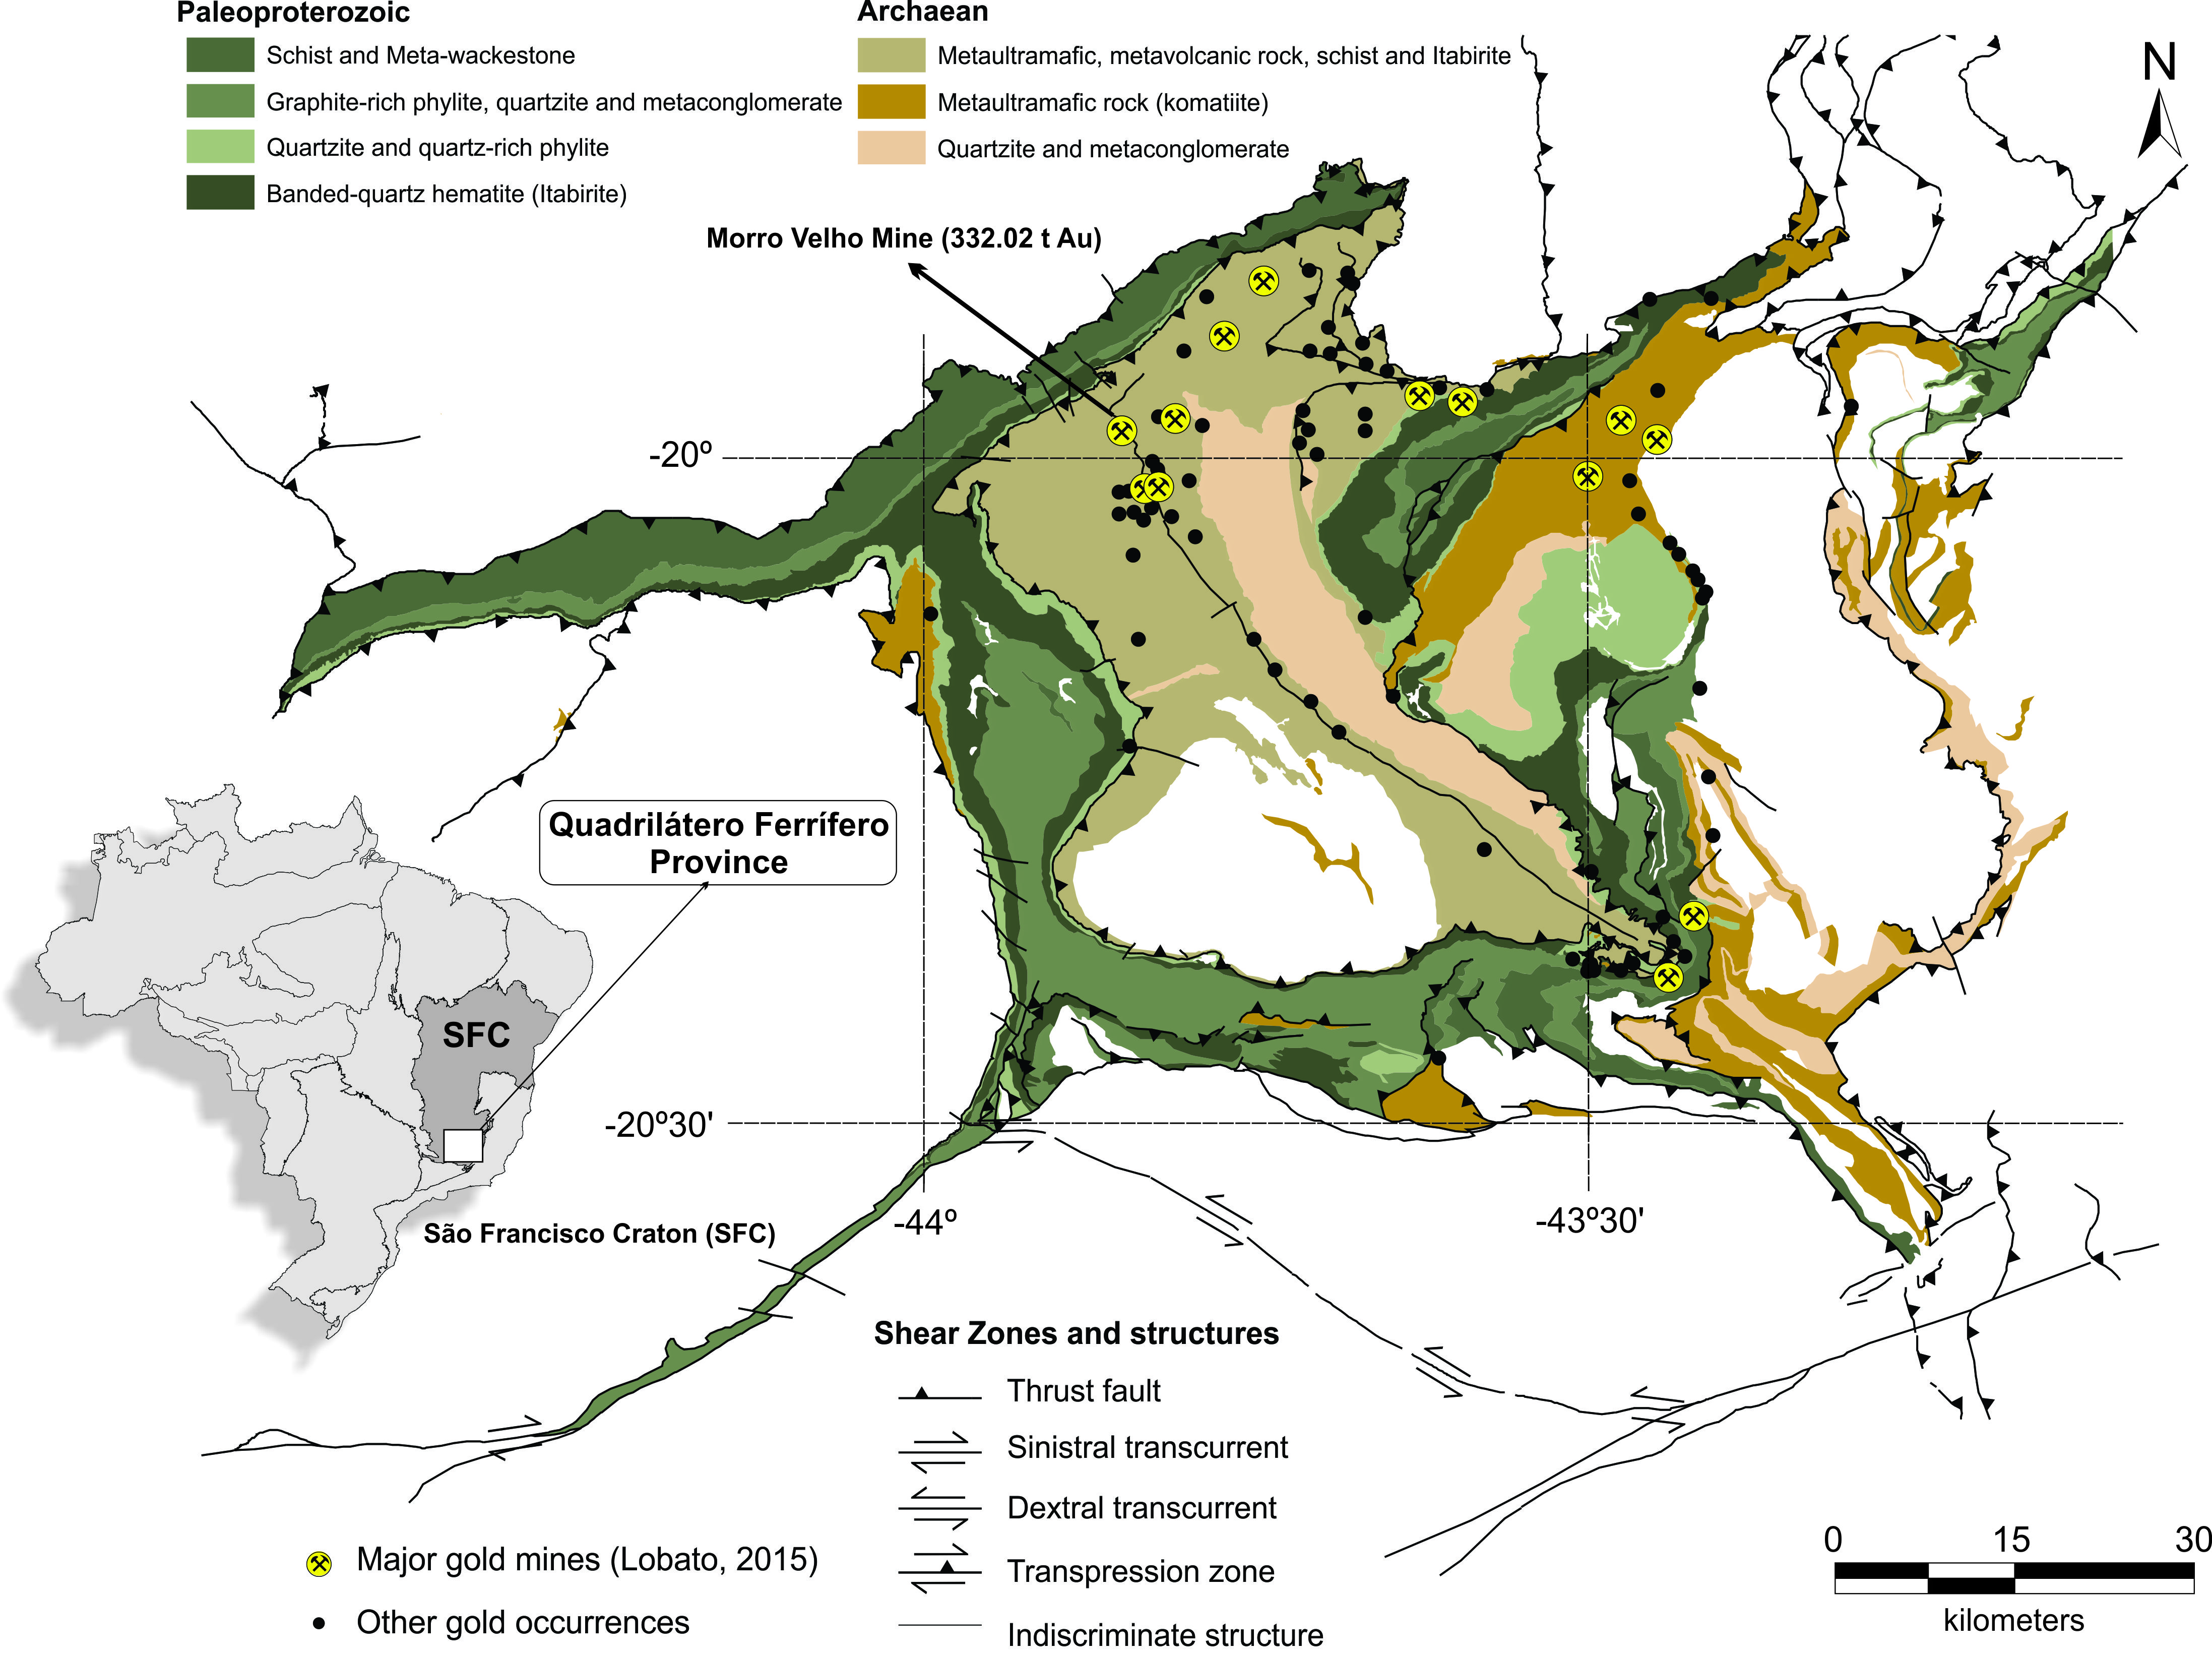

In [186]:
from IPython.core.display import Image 
print('Figure 1 – Simplified geological map of the Quadrilátero Ferrífero Metallogenetic Province, '
      'with emphasis on the Rio das Velhas Supergroup (greenish tones) and the Minas Supergroup (brown tons). '
      'The mines listed in this work are represented by yellow filled circles. The black dots represent the other '
      'known occurrences and small mine sites.\n\n')
Image(filename='Figure_1_QF_max.jpg')

Figure 3 - Left - Descending order rank of known gold deposits of Quadrilátero Ferríferowith the power-law regression curve (red line) and the Zipf’s curve (black line).  Right - Log-log rank-size plot showing the known gold deposits, the power-law regression curve(red), and the Zipf’s curve (black). The observed maximum rank is shown in a dashed vertical blue line (rank 8).


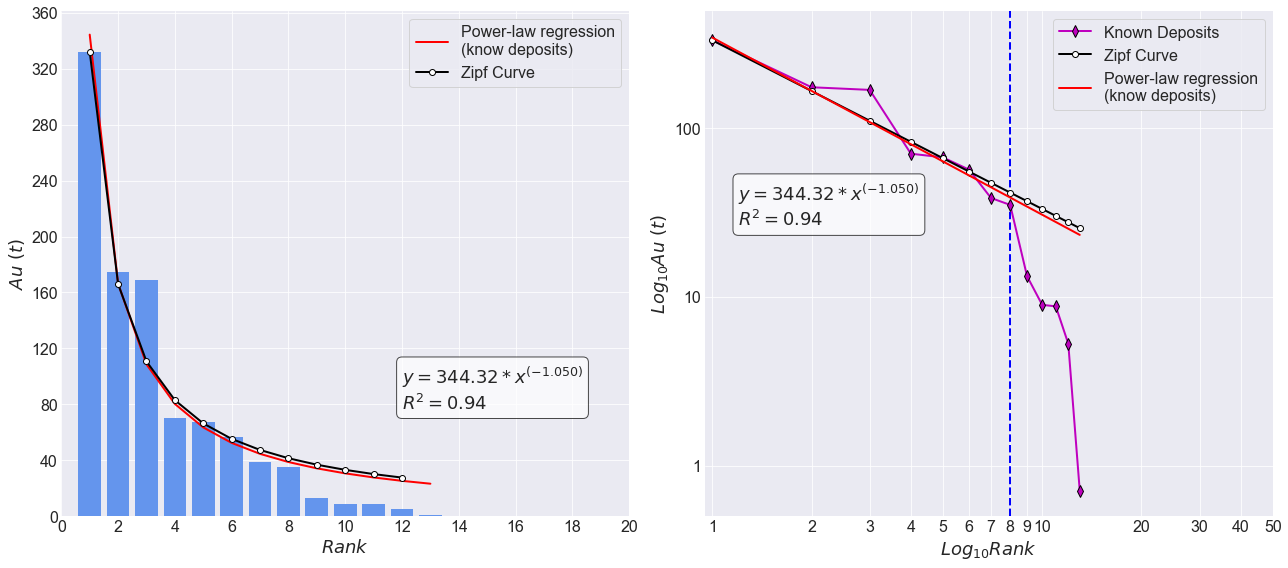

In [187]:
print('Figure 3 - Left - Descending order rank of known gold deposits of Quadrilátero Ferrífero'
      'with the power-law regression curve (red line) and the Zipf’s curve (black line). '
     ' Right - Log-log rank-size plot showing the known gold deposits, the power-law regression curve'
      '(red), and the Zipf’s curve (black). The observed maximum rank is shown in a dashed vertical blue line (rank 8).')

# Calculate fit curve
popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  rank,  value)
power_y = popt[0]*rank**-popt[1]

x_zipf = np.arange(1., len(rank))
C = value[0]
y_zipf = C*x_zipf**(-k)

fig = plt.figure(figsize=(18,8))
props = dict(boxstyle='round', facecolor='white', alpha=0.7)

ax1 = fig.add_subplot(121)
ax1.bar(rank,value,color='cornflowerblue')
ax1.plot(rank, power_y, linewidth=2, color='r',label='Power-law regression\n(know deposits)')
ax1.plot(x_zipf, y_zipf, linewidth=2, color='k',marker='o',markerfacecolor='white',label='Zipf Curve')
ax1.legend(fontsize=16,frameon=True)
ax1.set_xlim(0,20)
ax1.set_xlabel(r'$Rank$',fontsize=18)
ax1.set_ylabel(r'$Au\ (t)$',fontsize=18)

textstr = '\n'.join((
        r'$y = %.2f*x^{(-%.3f)}$' % (popt[0],popt[1]),
        r'$R^2 = %.2f$' % r2_score(value, power_y)))
        
ax1.text(0.60, 0.3, textstr,transform=ax1.transAxes, fontsize=18, verticalalignment='top', bbox=props)
ax1.xaxis.set_tick_params(labelsize = 16)
ax1.yaxis.set_tick_params(labelsize = 16)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

x_zipf = np.arange(1., len(rank)+1)
C = value[0]
y_zipf = C*x_zipf**(-k)

ax2 = fig.add_subplot(122)
ax2.axvline(x=8,linewidth=2,color='blue',linestyle='dashed')
ax2.plot(rank, value, linewidth=2,color='m',marker='d',markersize=8,markeredgecolor='k',label='Known Deposits')
ax2.plot(x_zipf, y_zipf, linewidth=2, color='k',marker='o',markerfacecolor='white',label='Zipf Curve')
ax2.loglog()
ax2.set_xlim(0.95,50)
ax2.set_ylim(0.5,max(value)*1.5)
ax2.set_xlabel(r'$Log_{10}Rank$',fontsize=18)
ax2.set_ylabel(r'$Log_{10}Au\ (t)$',fontsize=18)
ax2.xaxis.set_tick_params(labelsize = 16)
ax2.yaxis.set_tick_params(labelsize = 16)
ax2.xaxis.set_ticks([1,10,50])
ax2.xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,20,30,40,50])
ax2.axes.set_xticklabels([1,2,3,4,5,6,7,8,9,10,20,30,40,50])

#### Equation with all ranks ########
popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  rank,  value)
power_y = popt[0]*rank**-popt[1]

textstr = '\n'.join((
        r'$y = %.2f*x^{(-%.3f)}$' % (popt[0],popt[1]),
        r'$R^2 = %.2f$' % r2_score(value, power_y)))
ax2.text(rank[-1:]-11.8, power_y[-1:]+25, textstr, fontsize=18, verticalalignment='top', bbox=props)
ax2.plot(rank, power_y, linewidth=2,color='red',label='Power-law regression\n(know deposits)')
ax2.legend(fontsize=16,frameon=True)
ax2.axes.set_yticklabels([0.001,0.1,1,10,100,1000])

plt.tight_layout()


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Comparison between the power-law and alternative distributions for the gold deposits of the Quadrilátero Ferrífero. Table 3

Exponential (R) = 389.48  p = 0.00



Calculating best minimal value for power law fit
Assuming nested distributions


Truncated Power-Law (R) = -0.23  p = 0.49

Stretched Exponential (R) = 2.33  p = 0.32

Lognormal positive (R) = 47.63  p = 0.00



<IPython.core.display.Latex object>

Figure 4 and 5: Left (Figure 4) - Kolmogorov-Smirnov’s distance for the known deposits of Quadrilátero Ferrífero. The minimum of the function (dashed vertical blue line) stands at rank 8 (or x_min=35.08). Right (Figure 5a)- Kolmogorov-Smirnov’s distance for the known deposits aggregated with Zipf’s estimated deposits until a) the smallest deposit (Itabira; 0.71 t)


Observation -  Figure 5b to 0.01 t takes a couple hours to run, therefore we decide not to include in this notebook, however if you would like to run change the value of variable ct in this cell to 0.01.)


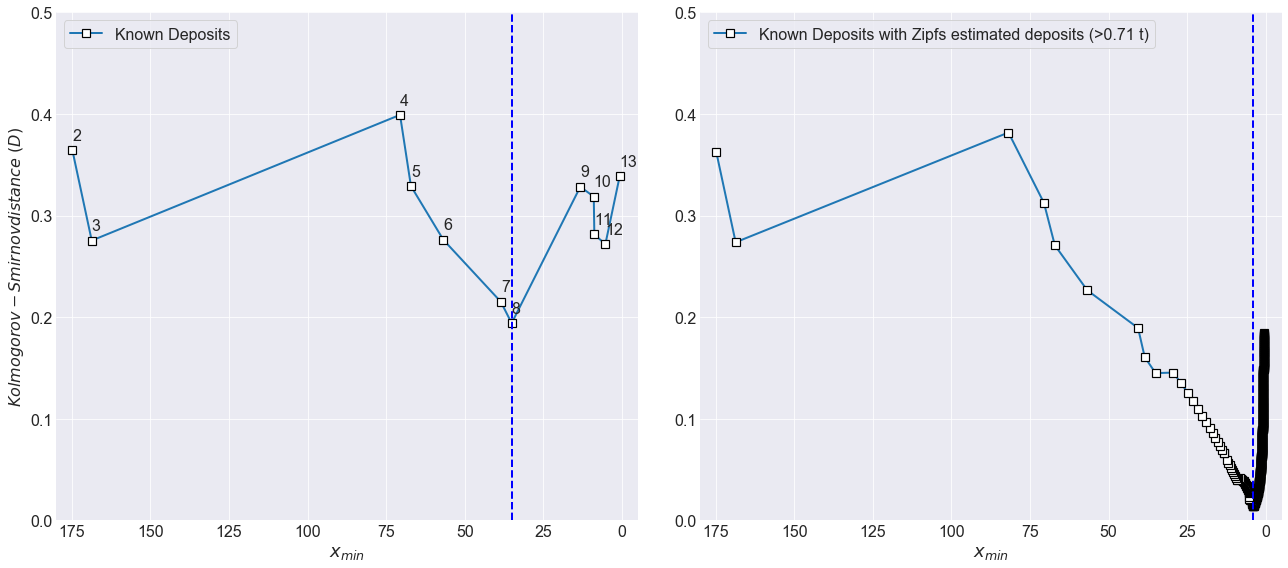

In [188]:
ct = 0.71
fig = plt.figure(figsize=(18,8))
props = dict(boxstyle='round', facecolor='white', alpha=0.7)

ax1 = fig.add_subplot(121)
results = powerlaw.Fit(value)
ax1.plot(results.xmins, results.Ds,marker='s',linewidth=2,markersize=8,markeredgecolor='k',markerfacecolor='white',markeredgewidth=1.2,label='Known Deposits')
ax1.axvline(x=results.xmin,linewidth=2,color='blue',linestyle='dashed')
ax1.set_xlim(180,-5)
ax1.set_ylim(0,.5)
ax1.xaxis.set_tick_params(labelsize = 16)
ax1.yaxis.set_tick_params(labelsize = 16)
ax1.set_ylabel(r'$Kolmogorov-Smirnov distance\ (D)$',fontsize=16)
ax1.set_xlabel(r'$x_{min}$',fontsize=18)
ax1.legend(fontsize=16,frameon=True)

for i, txt in enumerate(np.sort(rank)[::-1][1:]+1):
    ax1.annotate(txt, (results.xmins[i]+0.01, results.Ds[i]+0.01),fontsize=16)

new_reserves,rank_new,value_new = zipf_fill(value,cutoff=ct)

ax2 = fig.add_subplot(122)

results = powerlaw.Fit(new_reserves,discrete=True)
ax2.plot(results.xmins, results.Ds,marker='s',linewidth=2,markersize=8,markeredgecolor='k',markerfacecolor='white',markeredgewidth=1.2,label='Known Deposits with Zipfs estimated deposits (>0.71 t)')
ax2.axvline(x=results.xmin,linewidth=2,color='blue',linestyle='dashed')
ax2.set_xlim(180,-5)
ax2.set_ylim(0,.5)
ax2.xaxis.set_tick_params(labelsize = 16)
ax2.yaxis.set_tick_params(labelsize = 16)
ax2.set_ylabel(r'$\ $',fontsize=18)
ax2.set_xlabel(r'$x_{min}$',fontsize=18)
ax2.legend(fontsize=16,frameon=True)
plt.tight_layout()


print('Comparison between the power-law and alternative distributions for the gold '
     'deposits of the Quadrilátero Ferrífero. Table 3' )
test_distributions(new_reserves)
display(Latex('$x_{min} = %i $' % int(results.xmin)))
print('Figure 4 and 5: Left (Figure 4) - Kolmogorov-Smirnov’s distance for the known deposits of Quadrilátero Ferrífero. '
'The minimum of the function (dashed vertical blue line) stands at rank 8 (or x_min=35.08). Right (Figure 5a)- '
'Kolmogorov-Smirnov’s distance for the known deposits aggregated with Zipf’s estimated deposits until '
'a) the smallest deposit (Itabira; 0.71 t)')

print('\n\nObservation -  Figure 5b to 0.01 t takes a couple hours to run, therefore we decide not to include in this notebook, '
'however if you would like to run change the value of variable ct in this cell to 0.01.)')


Figure 6 - Known gold deposits (blue bars) fitted to the Zipf’s curve, and the rank gaps filled with undiscovered deposits (red bars) with endowment larger than 4 t.


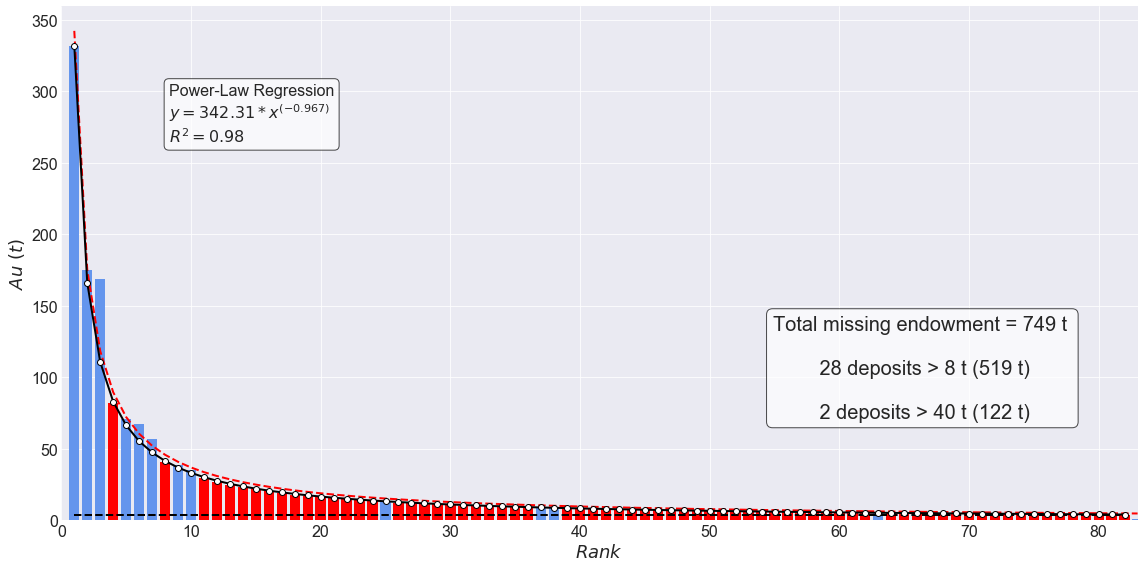

In [189]:
print('Figure 6 - Known gold deposits (blue bars) fitted to the Zipf’s curve, and the rank gaps filled '
      'with undiscovered deposits (red bars) with endowment larger than 4 t.')
new_reserves,rank_new,value_new = zipf_fill(value,cutoff=cutoff)

x_zipf = np.arange(1., max(rank_new))
C = value[0]
y_zipf = C*x_zipf**(-k)

rank = np.concatenate((rank_new,rank_reserves))
value = np.concatenate((value_new,values_reserves))
rank.sort()
value[::-1].sort()

popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  rank,  value)
power_y = popt[0]*rank**-popt[1]

#################### Plotting Figure

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(111)
ax1.bar(rank_new,value_new,color='cornflowerblue')
ax1.plot(x_zipf, x_zipf*0+cutoff, linewidth=2,linestyle='dashed', color='k',label='Cut-off > %i tons' % cutoff)
ax1.plot(rank, power_y, color='r',linewidth=2,linestyle='dashed',label='Power-law regression\n(know deposits)')
ax1.plot(x_zipf, y_zipf, linewidth=2, color='k',marker='o',markerfacecolor='white',label='Zipf Curve')
ax1.set_xlim(0,max_rank)
ax1.bar(rank_reserves,values_reserves,color='r') # New Discoverie
ax1.set_xlabel(r'$Rank$',fontsize=18)
ax1.set_ylabel(r'$Au\ (t)$',fontsize=18)
ax1.xaxis.set_tick_params(labelsize = 16)
ax1.yaxis.set_tick_params(labelsize = 16)


textstr_2 = 'Total missing endowment = %i t \n\n %i deposits > 8 t (%i t)\n\n %i deposits > 40 t (%i t)' % (int(sum(values_reserves)),len(values_reserves[values_reserves > 8]),int(sum(values_reserves[values_reserves > 8])),len(values_reserves[values_reserves > 40]),int(sum(values_reserves[values_reserves > 40])))

ax1.text(0.80, 0.4, textstr_2, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props,horizontalalignment='center')

textstr = '\n'.join((
        'Power-Law Regression',
        r'$y = %.2f*x^{(-%.3f)}$' % (popt[0],popt[1]),
        r'$R^2 = %.2f$' % r2_score(value, power_y)))
        
ax1.text(0.1, 0.85, textstr,transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


plt.tight_layout()